In [23]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [42]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

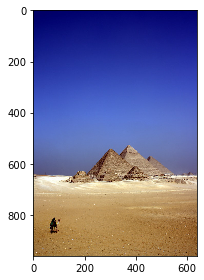

In [25]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [26]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

Coffee image shape:  (446, 640, 3)
Vertical Half Coffee image shape:  (446, 320, 3)
Horizontal Half Coffee image shape:  (223, 640, 3)


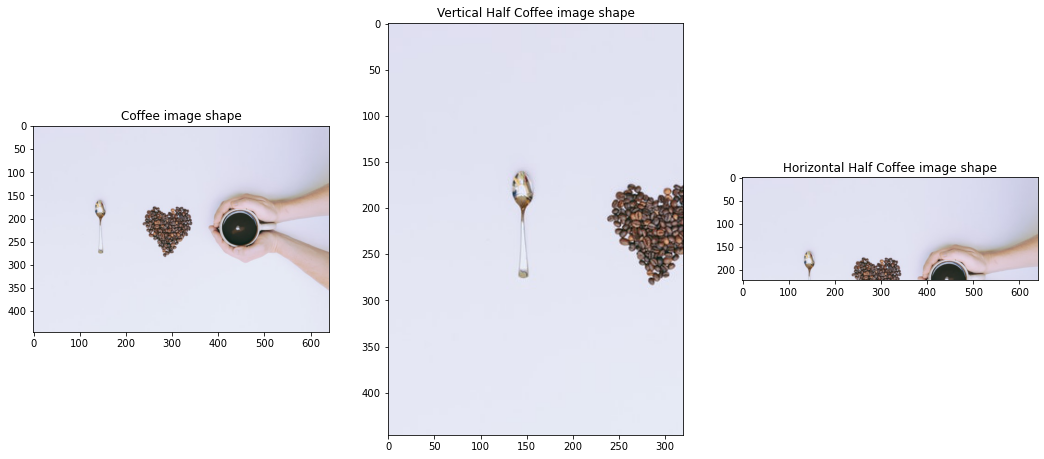

In [31]:
'''
@TODO:
Requirement #1   
-----hint :use the attribute shape of numpy to get the image object dimentions
'''

'''Read and print image coffee'''
coffee = io.imread('coffee.jpeg')
print('Coffee image shape: ', coffee.shape)
#io.imshow(coffee)

'''Show and print half of the image'''
rows, cols, _ = coffee.shape
half_rows, half_cols = rows//2, cols//2

vertical_half_coffee = coffee[:, :half_cols]
print('Vertical Half Coffee image shape: ', vertical_half_coffee.shape)
#io.imshow(vertical_half_coffee)

horizontal_half_coffee = coffee[:half_rows]
print('Horizontal Half Coffee image shape: ', horizontal_half_coffee.shape)
#io.imshow(horizontal_half_coffee)

show_images([coffee, vertical_half_coffee, horizontal_half_coffee], ['Coffee image shape', 'Vertical Half Coffee image shape', 'Horizontal Half Coffee image shape'])


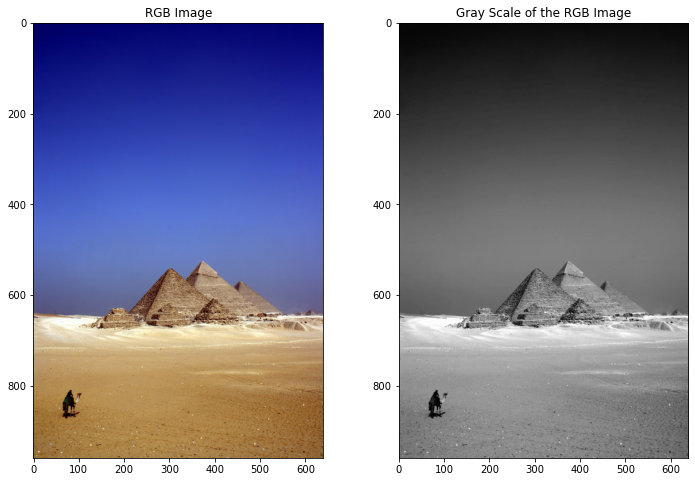

In [33]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
'''

# 1- Write a function 'gray_image' that takes an image as input
def gray_image(image_path):
    # Read the image
    image = io.imread(image_path)
    # Get the gray scale of the image
    gray_scale = rgb2gray(image)
    # Display original image and the gray scale one side by side
    show_images([image, gray_scale], ['RGB Image', 'Gray Scale of the RGB Image'])

# Test your function with the image 'pyramids'
gray_image('pyramids.jpeg')

In [1]:
# 2- Write a function 'HSV_image' that takes an image as input
def HSV_image(image_path):
    # Read the image
    image = io.imread(image_path)
    # Get the HSV of the image
    hsv_image = rgb2hsv(image)
    hue = hsv_image[:, :, 0]
    sat = hsv_image[:, :, 1]
    val = hsv_image[:, :, 2]
    # show the RGB image and the HSV one side by side
    show_images([image, hue, sat, val], ['RGB Image', 'Hue Channel', 'Saturation Channel', 'Value Channel'])

# Test your function for the images in HSV Folder. And comment on the results
HSV_image('./hsv/ex1.png')
HSV_image('./hsv/ex2.jpg')
HSV_image('./hsv/ex3.jpg')

print("Hue is the actual color value", "Saturation is the intensity of the grey color", "Value represent the brightness which the image tends to white or black")

NameError: name 'io' is not defined

In [ ]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''


In [ ]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''